# Task -3  of Technohacks edutech official intern Program


# Churn Prediction

# 

# What is Customer Churn?
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


Objectives¶
I will explore the data and try to answer some questions like:

What's the % of Churn Customers and customers that keep in with the active services?
Is there any patterns in Churn Customers based on the gender?
Is there any patterns/preference in Churn Customers based on the type of service provided?
What's the most profitable service types?
Which features and services are most profitable?
Many more questions that will arise during the analysis


# 2. Loading libraries and data

In [736]:
# !pip install missingno

In [737]:
# !pip install seaborn --upgrade

In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mns
import seaborn as sns

In [739]:
#loading daa
churn_df=pd.read_csv("Customer_Churn.csv")

#    # 3.Understanding the data

In [740]:
churn_df.sample(5)
temp_df=churn_df.copy()

# The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents



In [741]:

#shape of dataset
churn_df.shape
#it contain 7043 row and 21 columns

(7043, 21)

the dataset have 7043 row AND 21 COLUMN

In [742]:
#GETTING OVERIEW OF DATSET
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [743]:
churn_df.columns.values #every columns in a array

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [744]:
churn_df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The target the we will use to guide the exploration is Churn


In [745]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4 . Visualize missing values

In [746]:
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# checking null value

<Axes: >

<Figure size 4000x1500 with 0 Axes>

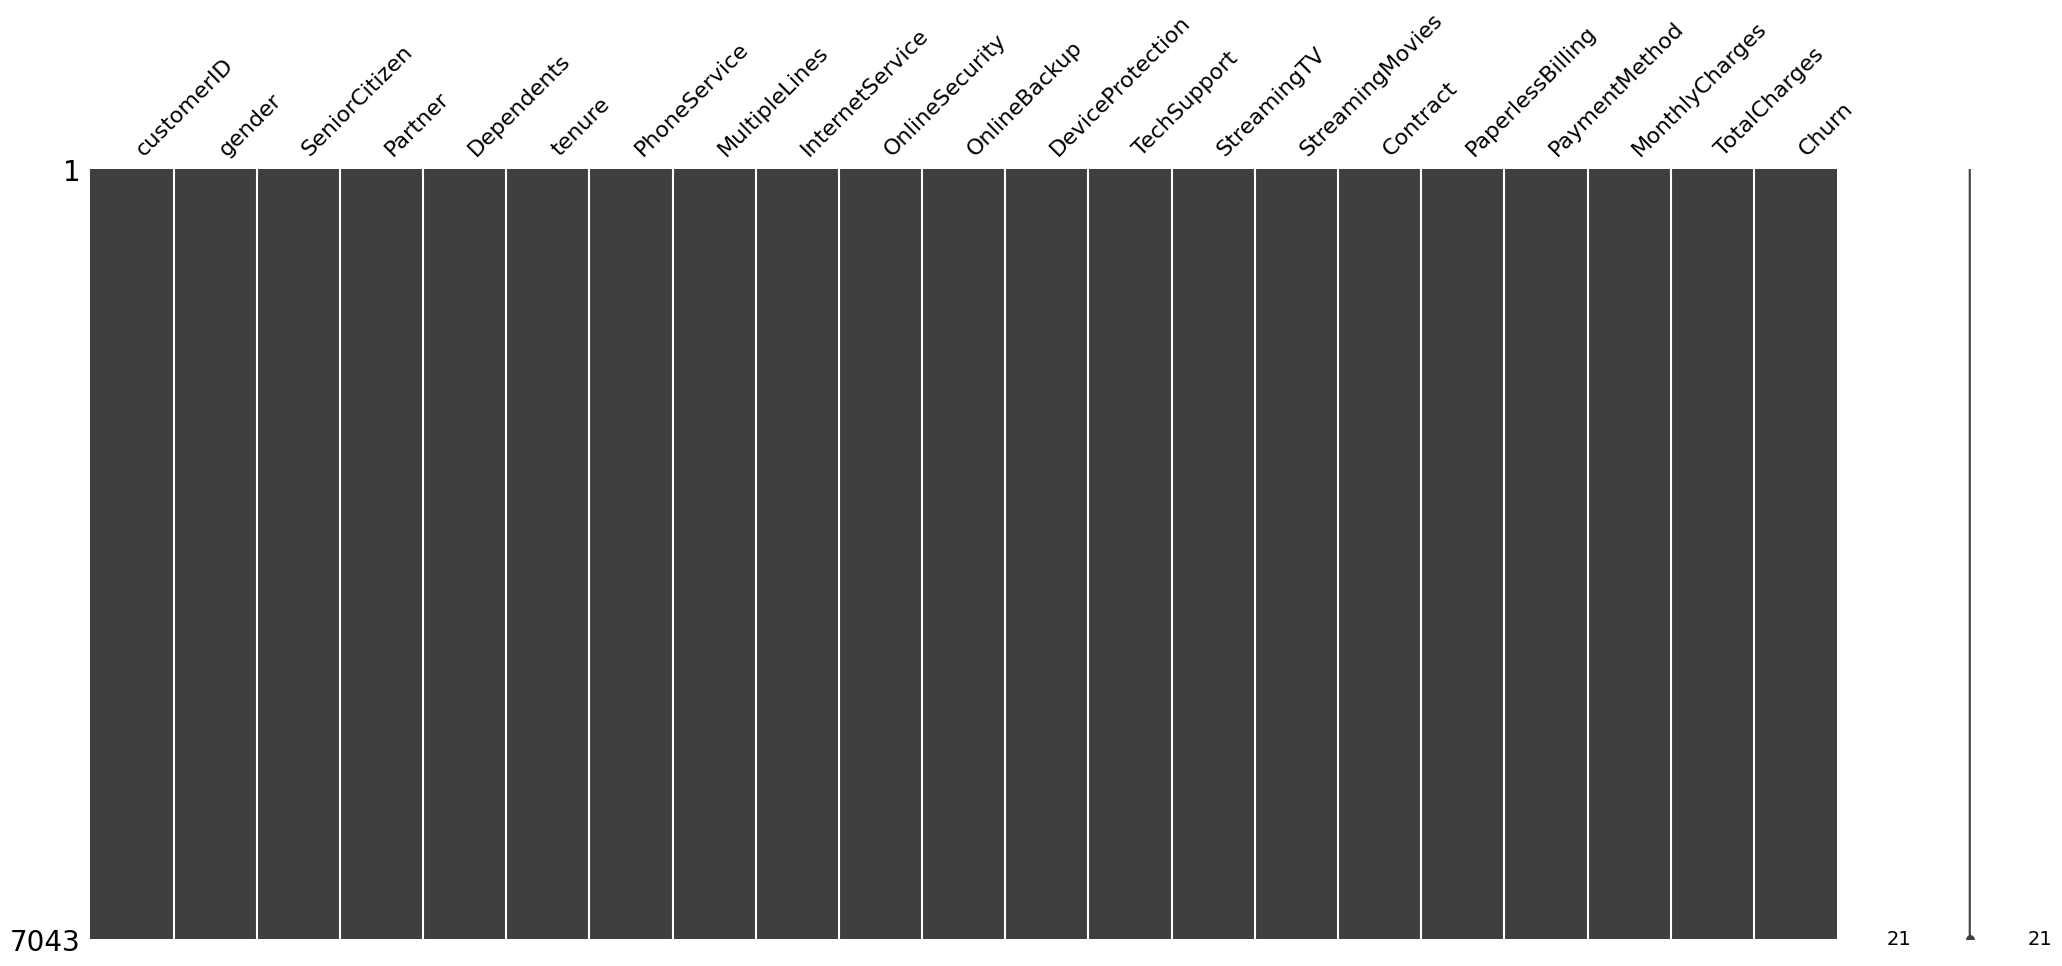

In [747]:
# Visualize missing values as a matrix
plt.figure(figsize=(40,15))
mns.matrix(churn_df)

# Using this matrix we can very quickly find the pattern of missingness in the dataset.

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data

In [748]:
#checking null value
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 5. Data Manipulation ¶

In [749]:
churn_df=churn_df.drop(["customerID"],axis=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [750]:
churn_df['TotalCharges']=pd.to_numeric(churn_df['TotalCharges'],errors='coerce')

In [751]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It contain 11 null  value in total_chargers

In [752]:
#checking number of nan
churn_df[pd.isna(churn_df['TotalCharges'])].shape

(11, 20)

In [753]:
churn_df[pd.isna(churn_df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [754]:
#the index having 0 tenure
churn_df[churn_df["tenure"]==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [755]:
#as the TotalCharges columns has Nan ,for same features tenure is 0
# dropping the column having 0 tenure

In [756]:
churn_df.drop(labels=churn_df[churn_df['tenure']==0].index,inplace=True,axis=0)

In [757]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# feature engineering

In [758]:
churn_df['SeniorCitizen']=churn_df['SeniorCitizen'].map({0:'No',1:"yes"})

In [759]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [760]:
churn_df['InternetService'].describe(include=['object','bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

# numeric cols

In [761]:

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# 6. Data Visualization 

In [762]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# individual visaulization of feature 

# univariate analysis

In [763]:
churn_df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [764]:
churn_df['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\25387428.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['gender'].value_counts()[0],churn_df['gender'].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\25387428.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['gender'].value_counts()[0],churn_df['gender'].value_counts()[1]]


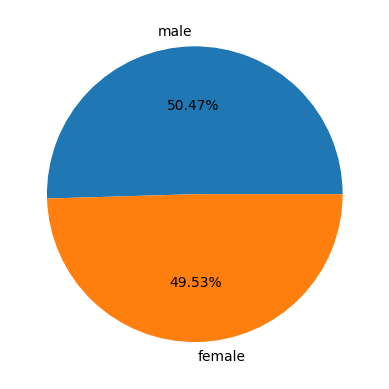

In [765]:
#pie chart
data=[churn_df['gender'].value_counts()[0],churn_df['gender'].value_counts()[1]]
data
plt.pie(data,labels=['male','female'],autopct='%.2f%%')
plt.show()

In [766]:
# data=[churn_df['SeniorCitizen'].value_counts()[0],churn_df['SeniorCitizen'].value_counts()[1]]
# data
# plt.pie(data,labels=['Yes',"No"],autopct='%.2f%%')
# plt.show()

#There is more number of senior citizen 

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


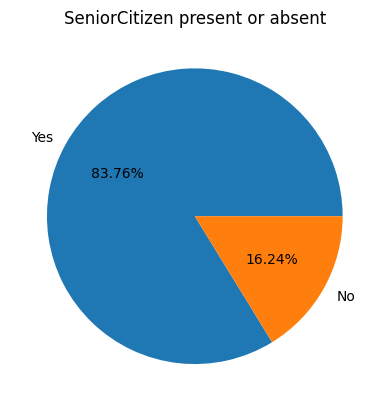

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


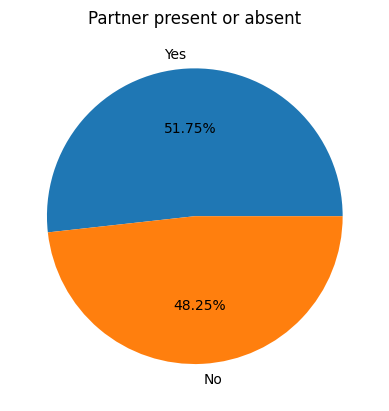

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


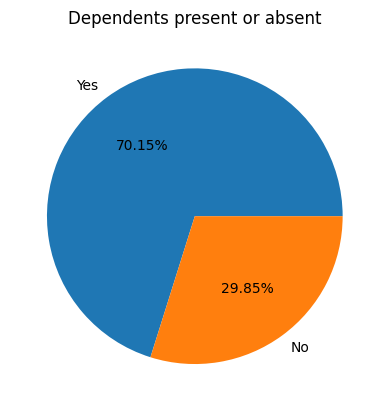

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


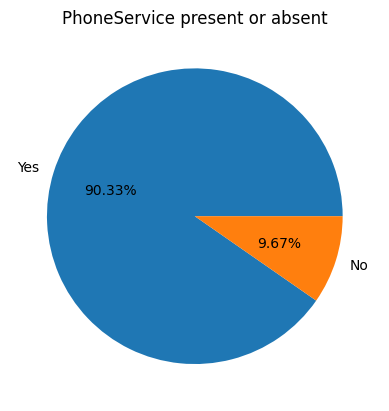

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


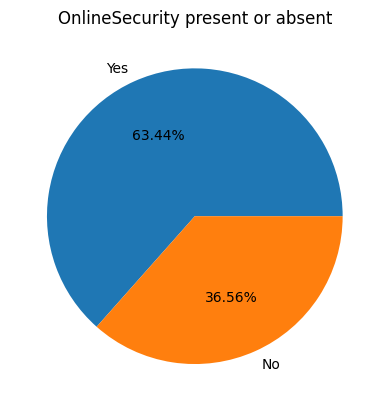

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


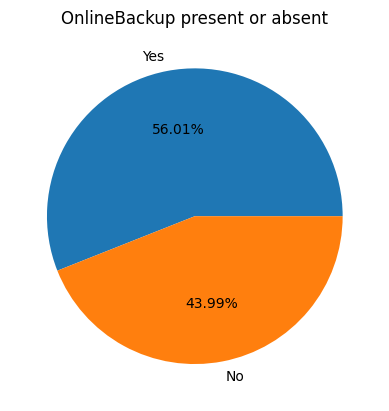

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


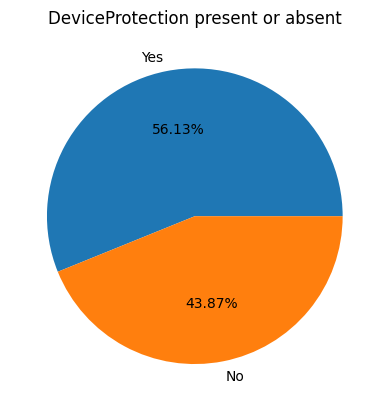

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


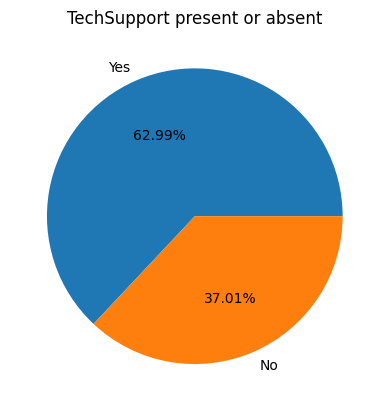

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


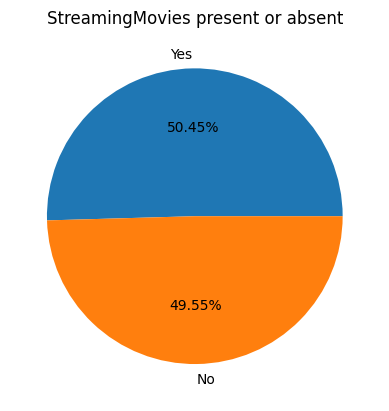

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


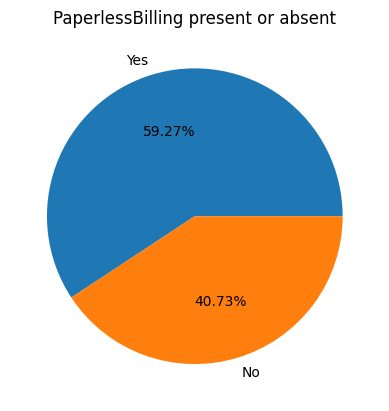

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3855642719.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]


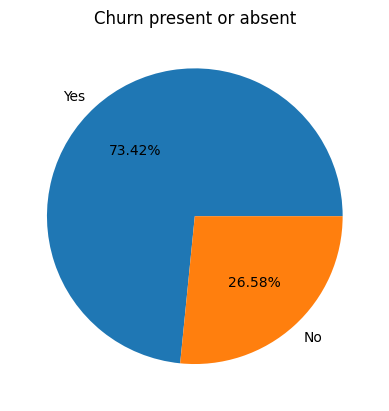

In [767]:
col=['SeniorCitizen','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','Churn']

for feature in col:
    data=[churn_df[feature].value_counts()[0],churn_df[feature].value_counts()[1]]
    plt.pie(data,labels=["Yes",'No'],autopct="%.2f%%")
    plt.title(f'{feature} present or absent')
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\2575105404.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['MultipleLines'].value_counts()[0],churn_df['MultipleLines'].value_counts()[1],churn_df['MultipleLines'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\2575105404.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['MultipleLines'].value_counts()[0],churn_df['MultipleLines'].value_counts()[1],churn_df['MultipleLines'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\2575105404.py:1: FutureWarning: Series.__getitem__ treating keys as posit

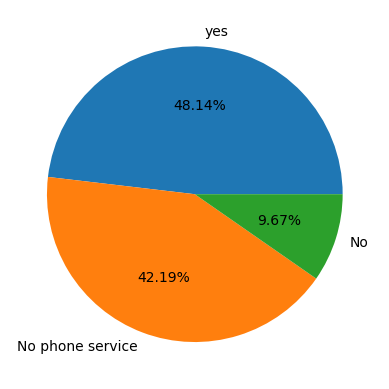

In [768]:

data=[churn_df['MultipleLines'].value_counts()[0],churn_df['MultipleLines'].value_counts()[1],churn_df['MultipleLines'].value_counts()[2]]
data
plt.pie(data,labels=['yes','No phone service',"No"],autopct='%.2f%%')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3531209329.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['InternetService'].value_counts()[0],churn_df['InternetService'].value_counts()[1],churn_df['MultipleLines'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3531209329.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['InternetService'].value_counts()[0],churn_df['InternetService'].value_counts()[1],churn_df['MultipleLines'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3531209329.py:1: FutureWarning: Series.__getitem__ treating keys 

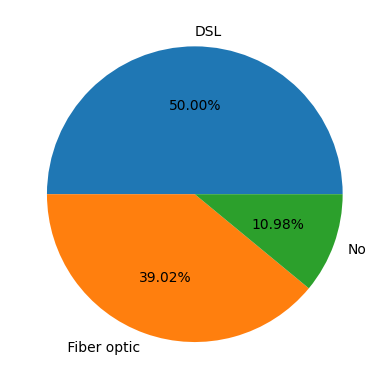

In [769]:
data=[churn_df['InternetService'].value_counts()[0],churn_df['InternetService'].value_counts()[1],churn_df['MultipleLines'].value_counts()[2]]
data
plt.pie(data,labels=['DSL',' Fiber optic','No'],autopct='%.2f%%')
plt.show()


In [770]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3259058437.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['PaymentMethod'].value_counts()[0],churn_df['PaymentMethod'].value_counts()[1],churn_df['PaymentMethod'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3259058437.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['PaymentMethod'].value_counts()[0],churn_df['PaymentMethod'].value_counts()[1],churn_df['PaymentMethod'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\3259058437.py:1: FutureWarning: Series.__getitem__ treating keys as posit

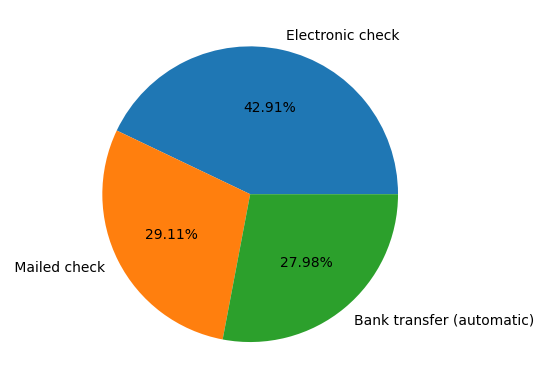

In [771]:
data=[churn_df['PaymentMethod'].value_counts()[0],churn_df['PaymentMethod'].value_counts()[1],churn_df['PaymentMethod'].value_counts()[2]]
data
plt.pie(data,labels=['Electronic check',' Mailed check','Bank transfer (automatic)'],autopct='%.2f%%')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\1841080823.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['Contract'].value_counts()[0],churn_df['Contract'].value_counts()[1],churn_df['Contract'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\1841080823.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data=[churn_df['Contract'].value_counts()[0],churn_df['Contract'].value_counts()[1],churn_df['Contract'].value_counts()[2]]
C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\1841080823.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a futur

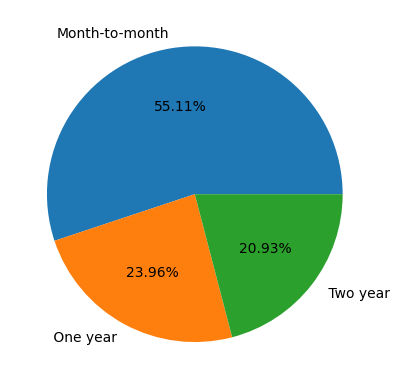

In [772]:
data=[churn_df['Contract'].value_counts()[0],churn_df['Contract'].value_counts()[1],churn_df['Contract'].value_counts()[2]]
data
plt.pie(data,labels=['Month-to-month',' One year',' Two year'],autopct='%.2f%%')
plt.show()


About 55% of customer with Month-to-Month Contract opted to move out as compared to 24% of customrs with One Year Contract and 21% with Two Year Contract

# numerical value visualization

In [773]:
churn_df['tenure'].sum()

227990

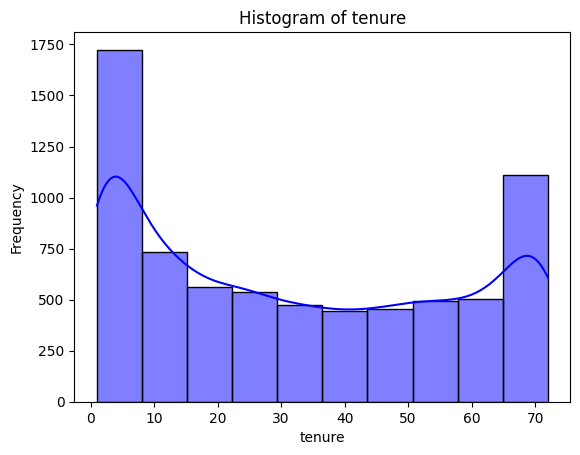

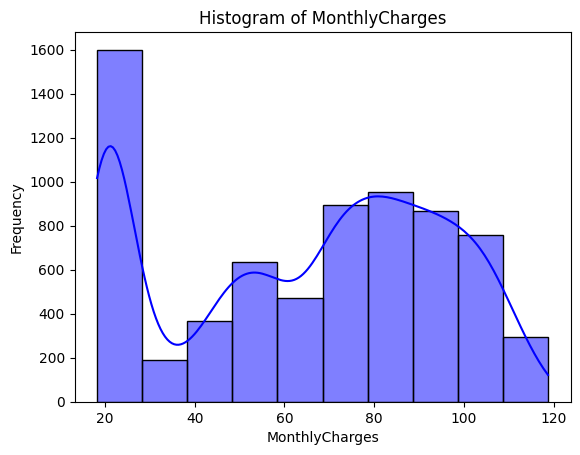

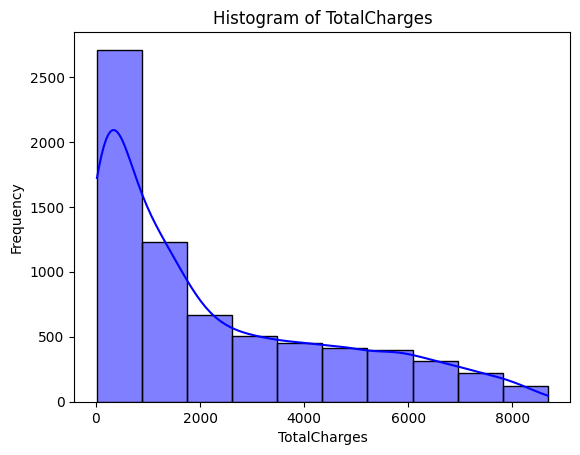

In [774]:
col=['tenure','MonthlyCharges','TotalCharges']
for feature in col:
    
    sns.histplot(data=churn_df[feature], bins=10, color='blue',kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

In [775]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#it give the probabality of the occuring the giiven value

# multivariate analysis

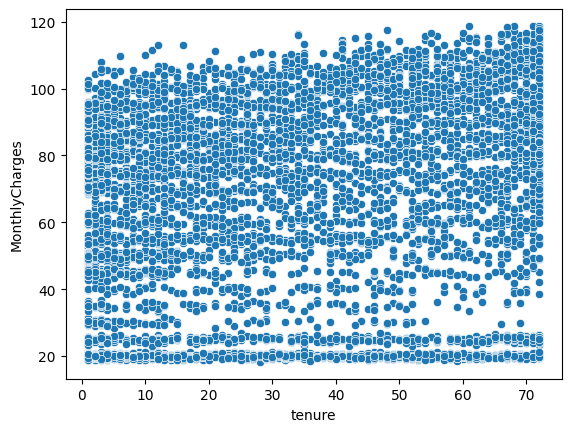

In [776]:
#numerical -Numerical
sns.scatterplot(x=churn_df['tenure'],y=churn_df['MonthlyCharges'])
plt.show()

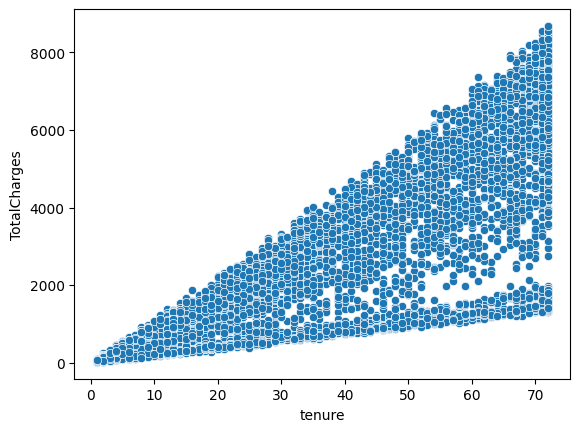

In [777]:
sns.scatterplot(x=churn_df['tenure'],y=churn_df['TotalCharges'])
plt.show()

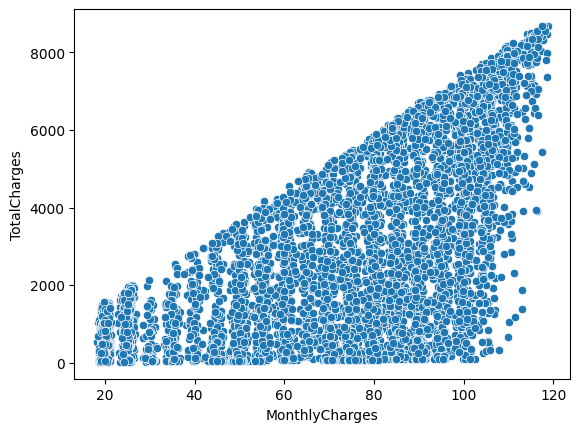

In [778]:
sns.scatterplot(x=churn_df['MonthlyCharges'],y=churn_df['TotalCharges'])
plt.show()

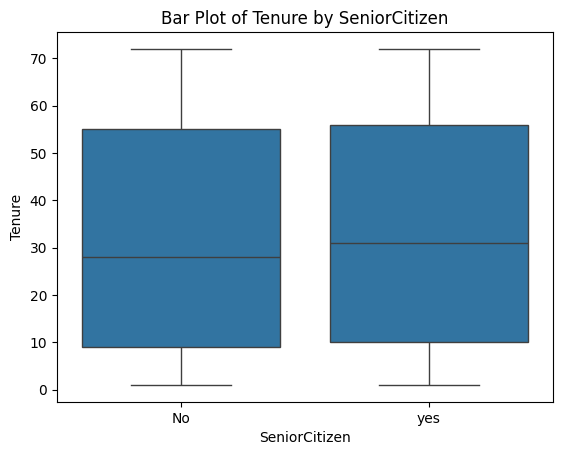

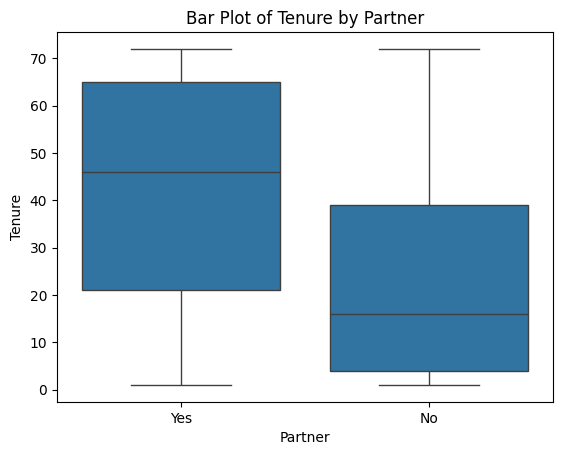

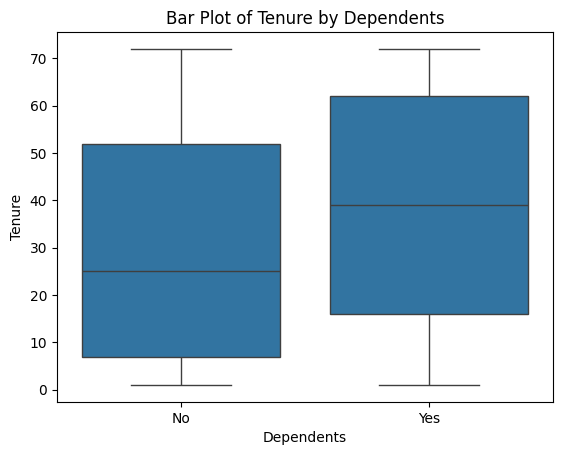

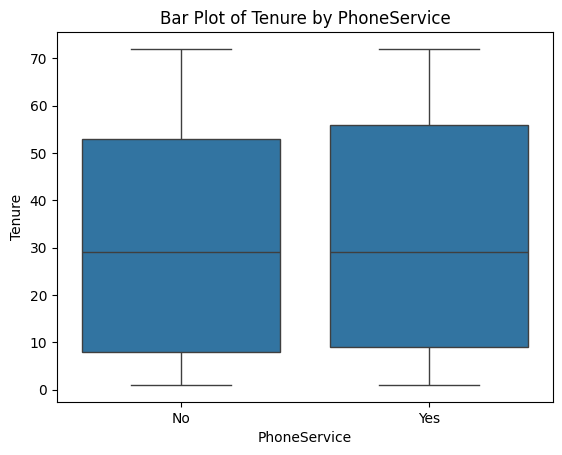

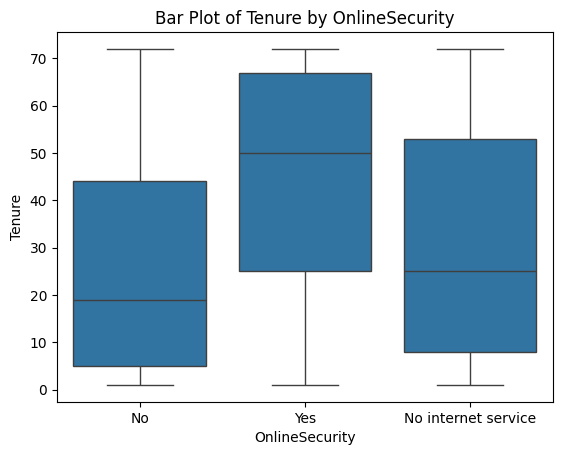

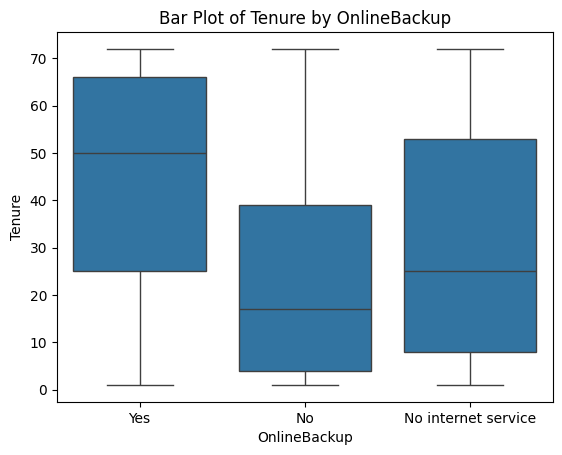

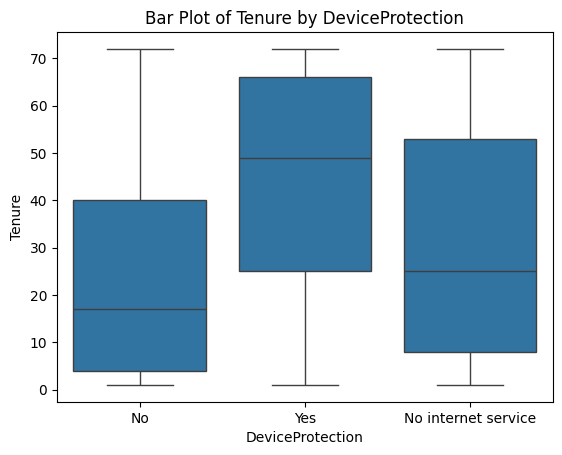

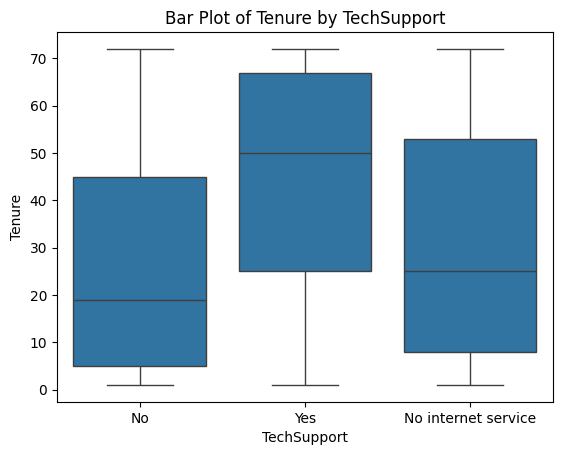

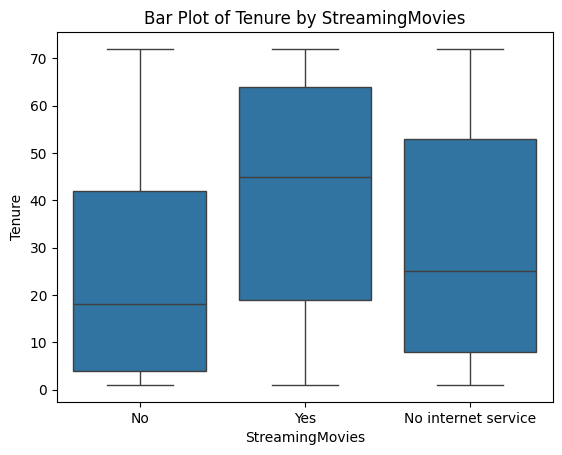

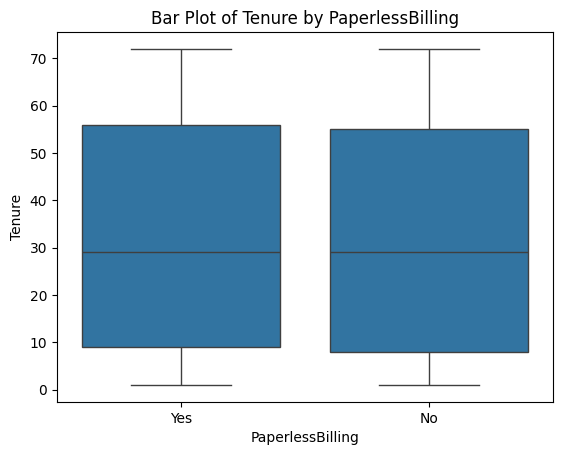

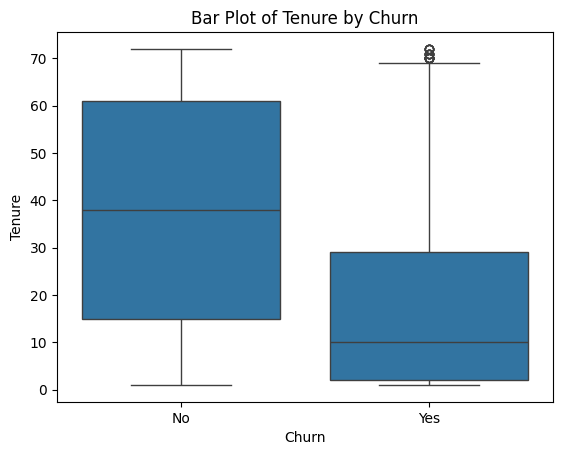

In [779]:
col=['SeniorCitizen','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','Churn']
for feature in col:
    sns.boxplot(data=churn_df, x=feature, y='tenure')
    plt.xlabel(feature)
    plt.ylabel('Tenure')
    plt.title(f'Bar Plot of Tenure by {feature}')
    plt.show()

In [780]:
# for the chrun having no churn
churn_df['Churn'][churn_df['Churn']=='No'].groupby(by=churn_df['gender']).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [781]:
# for the chrun having no churn
churn_df['Churn'][churn_df['Churn']=='Yes'].groupby(by=churn_df['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [782]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [783]:
churn_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

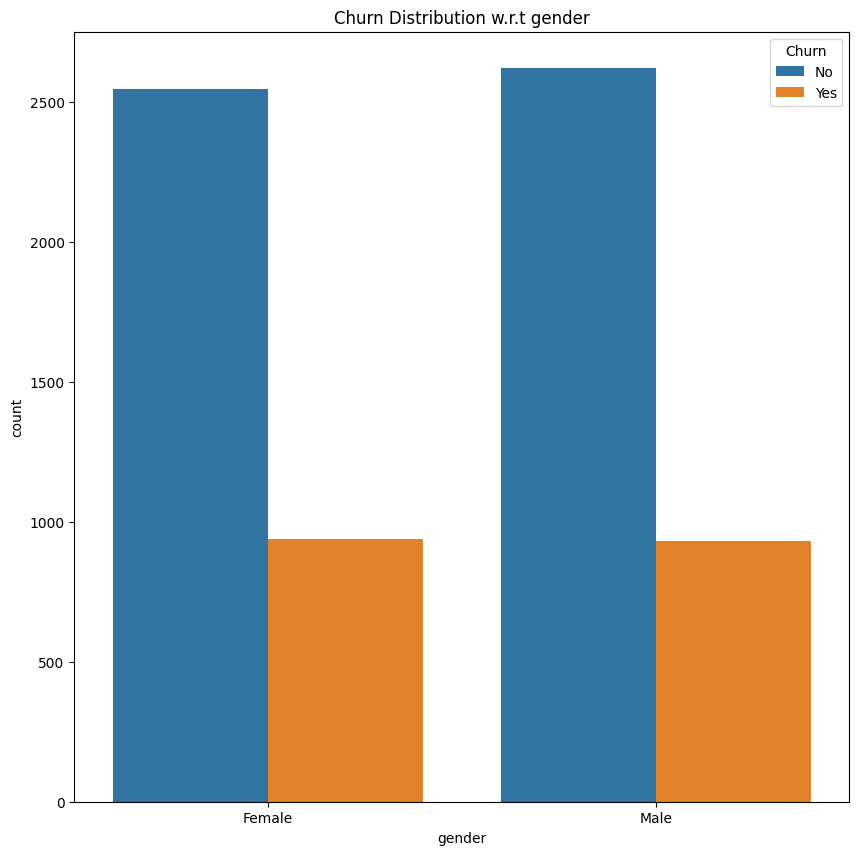

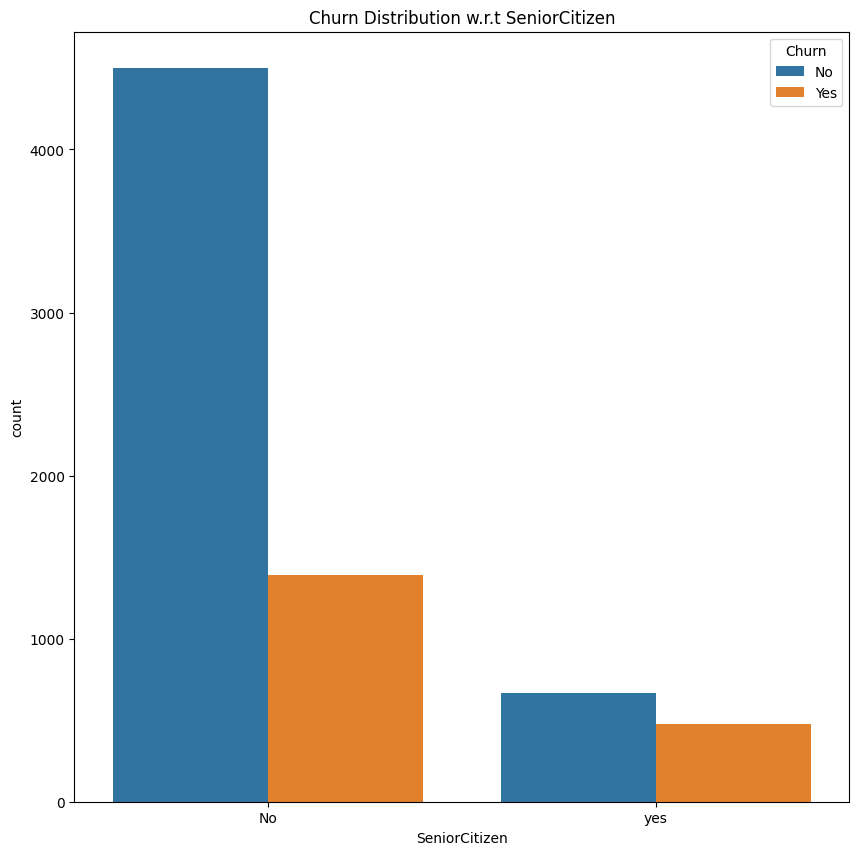

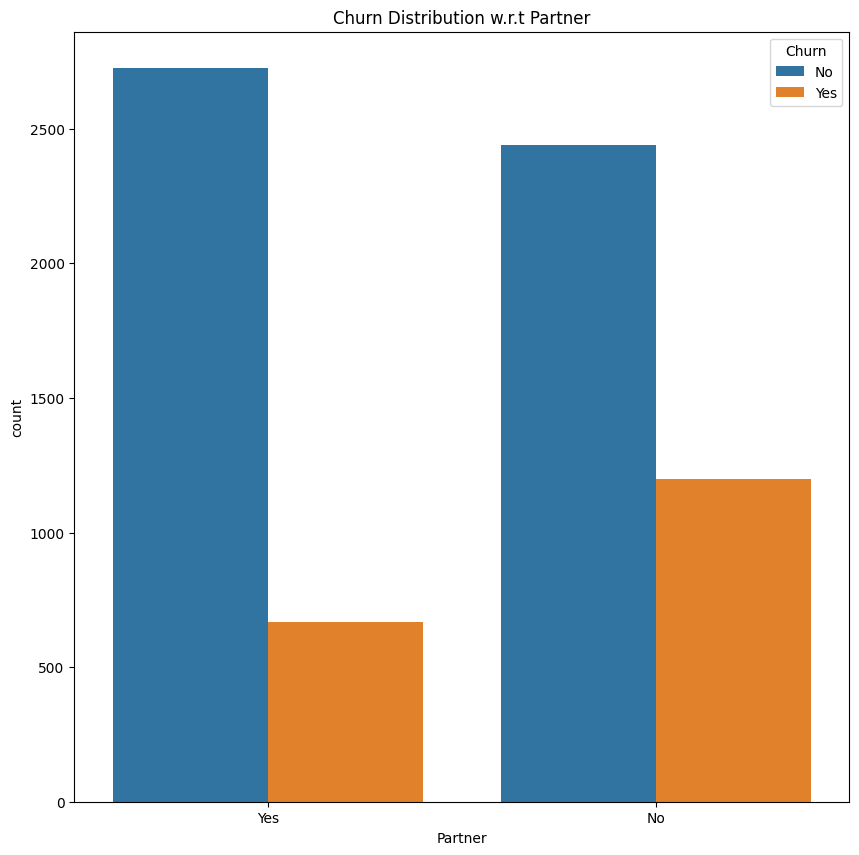

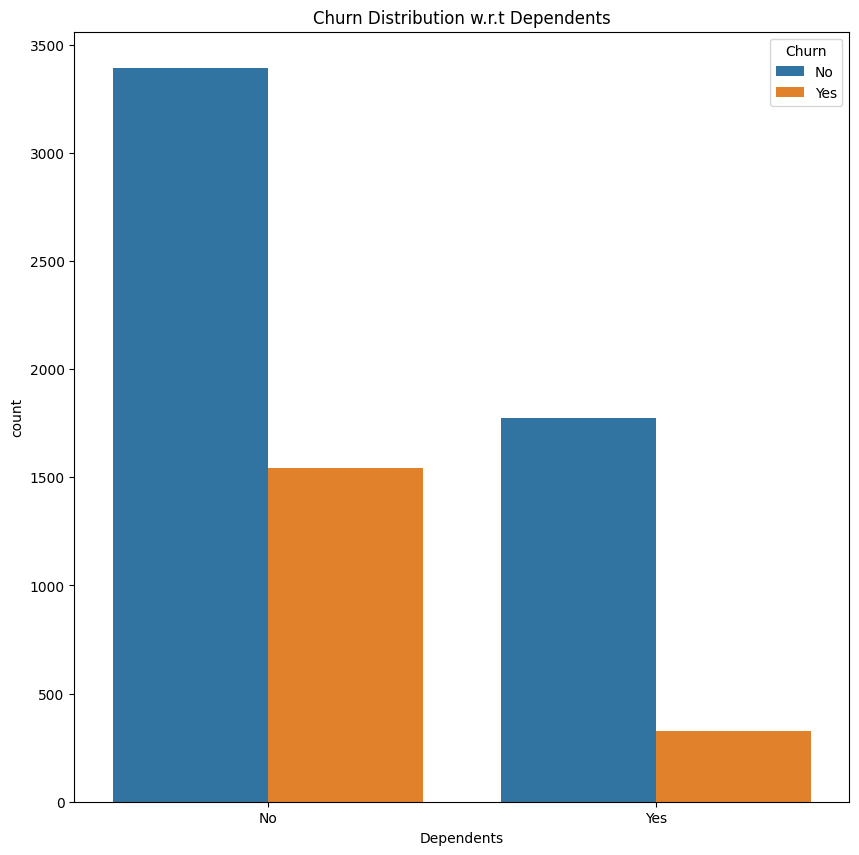

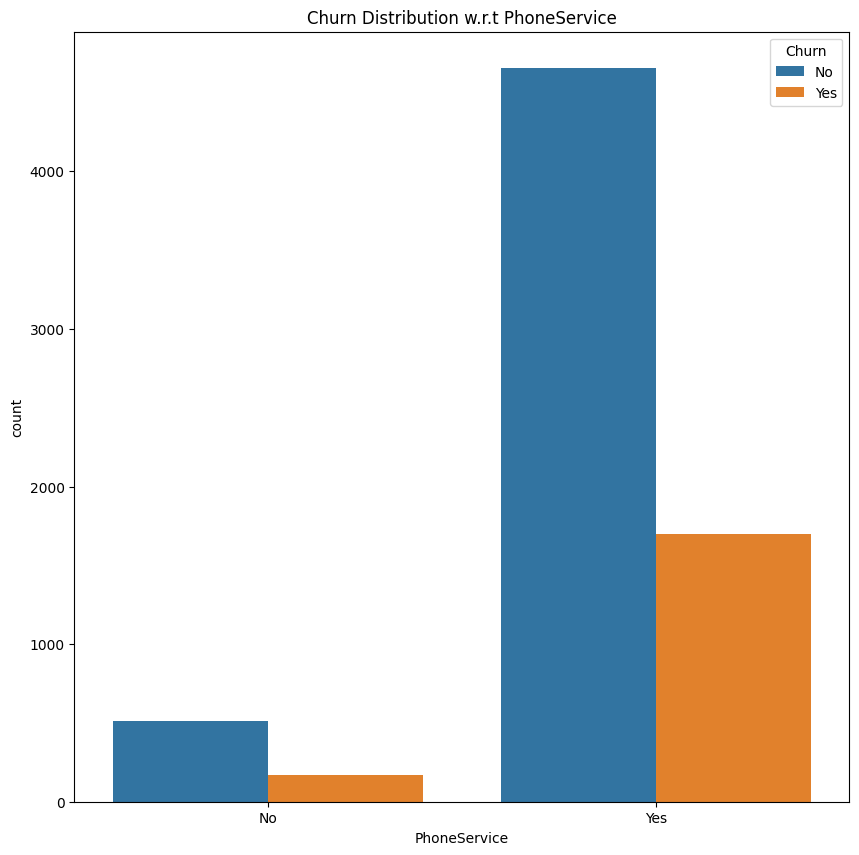

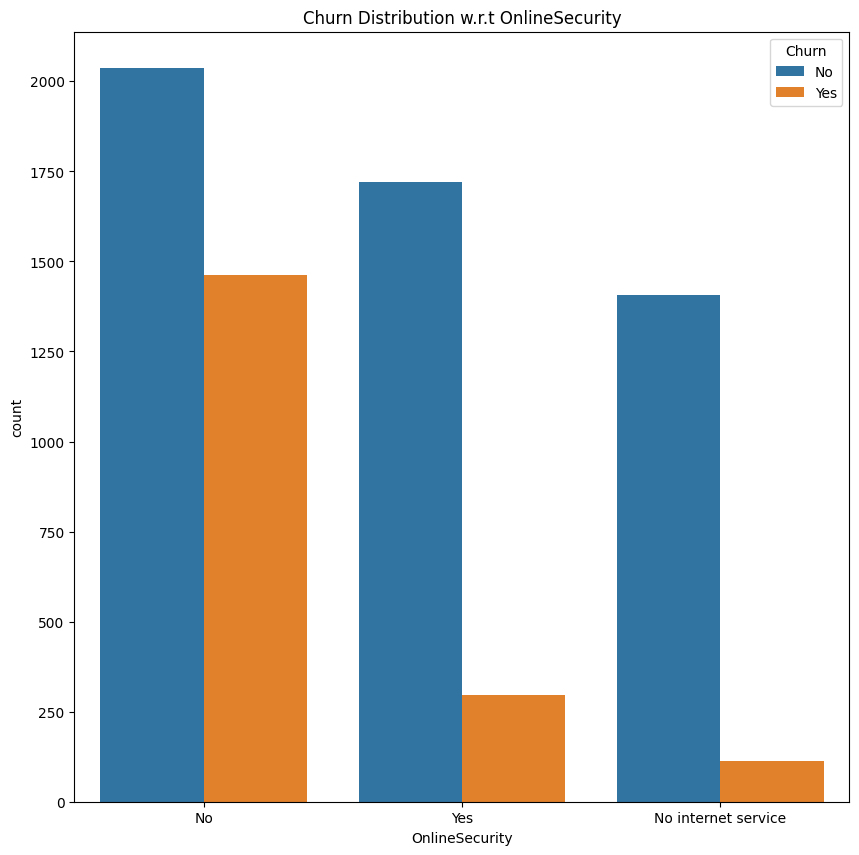

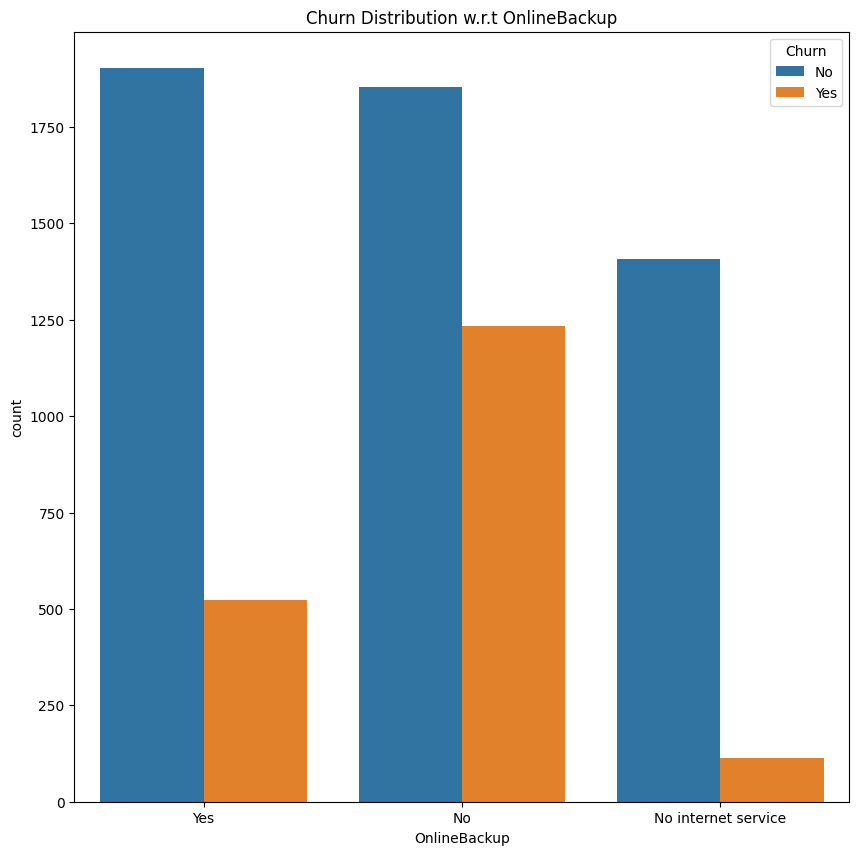

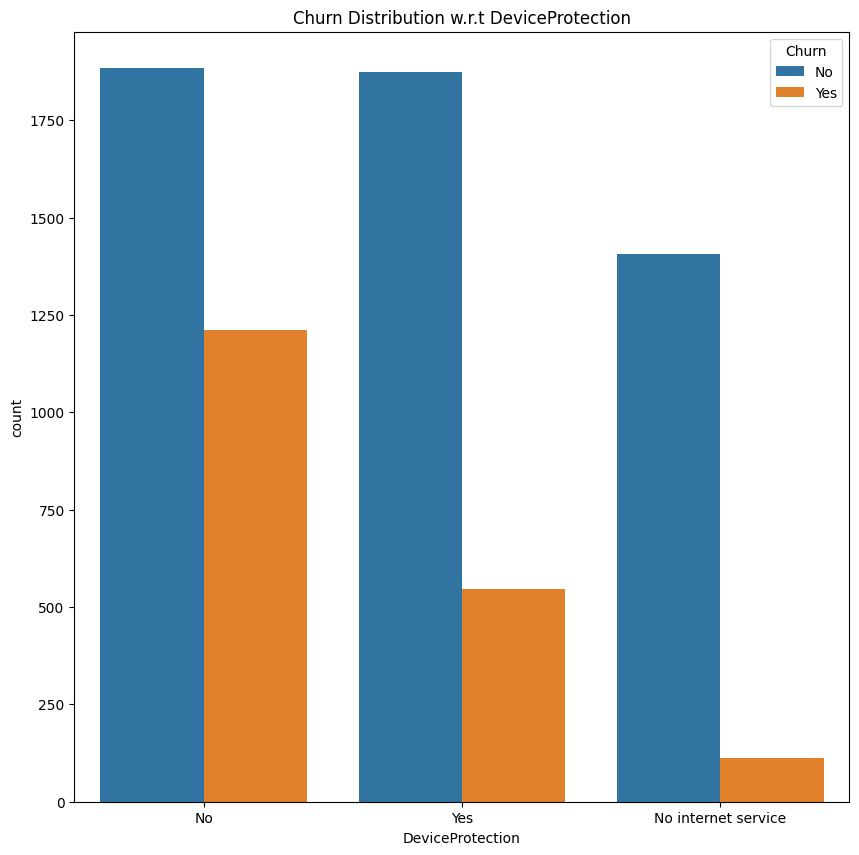

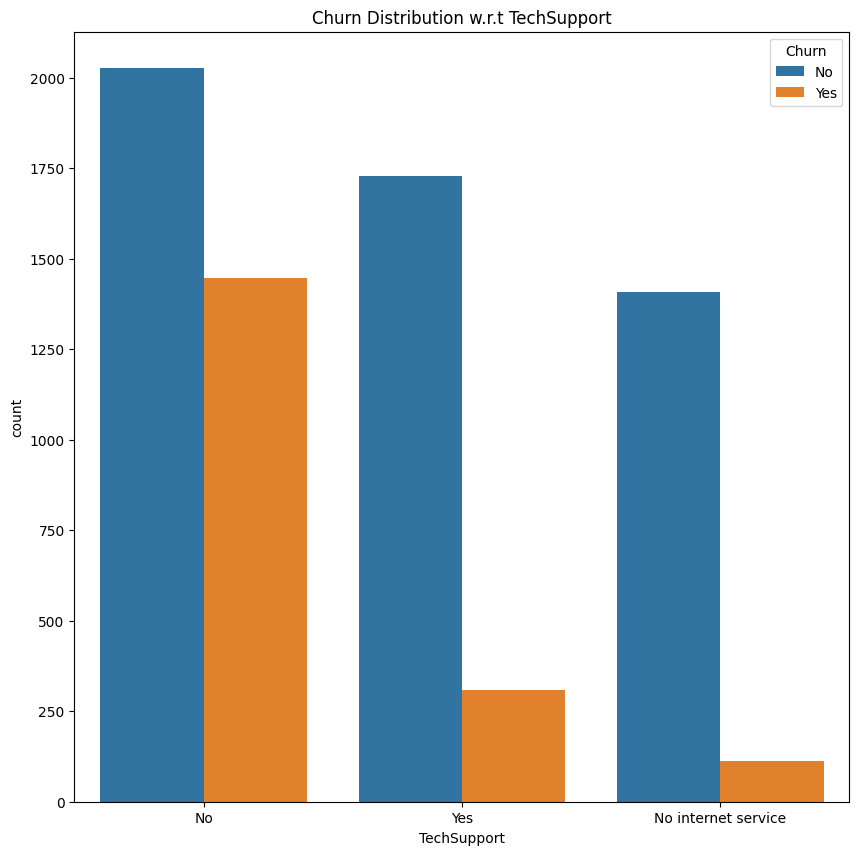

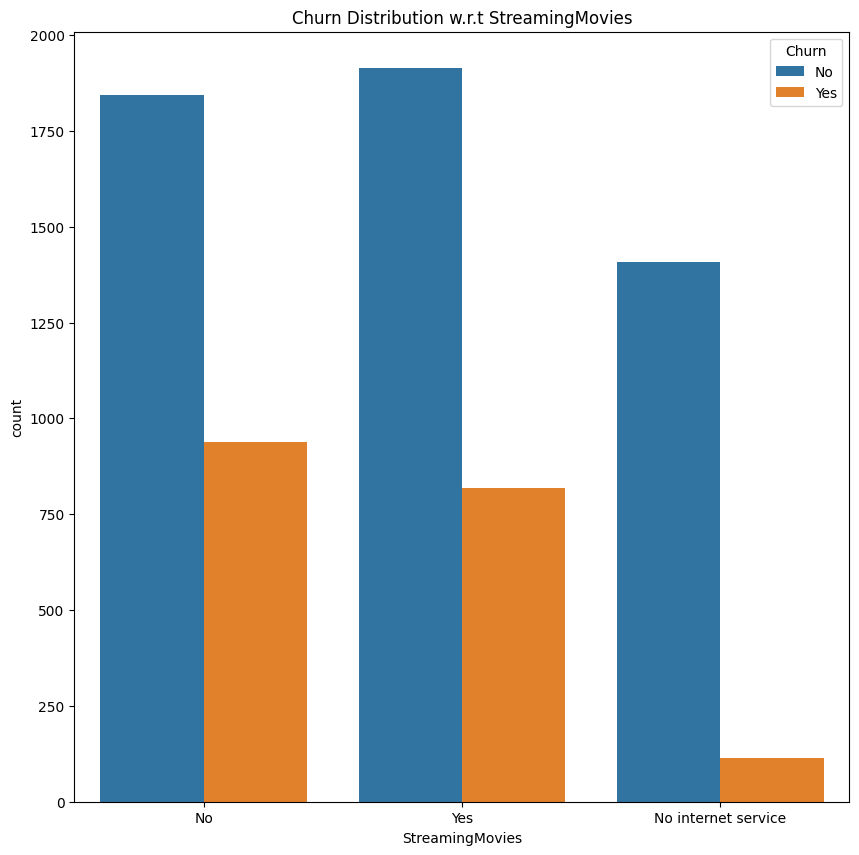

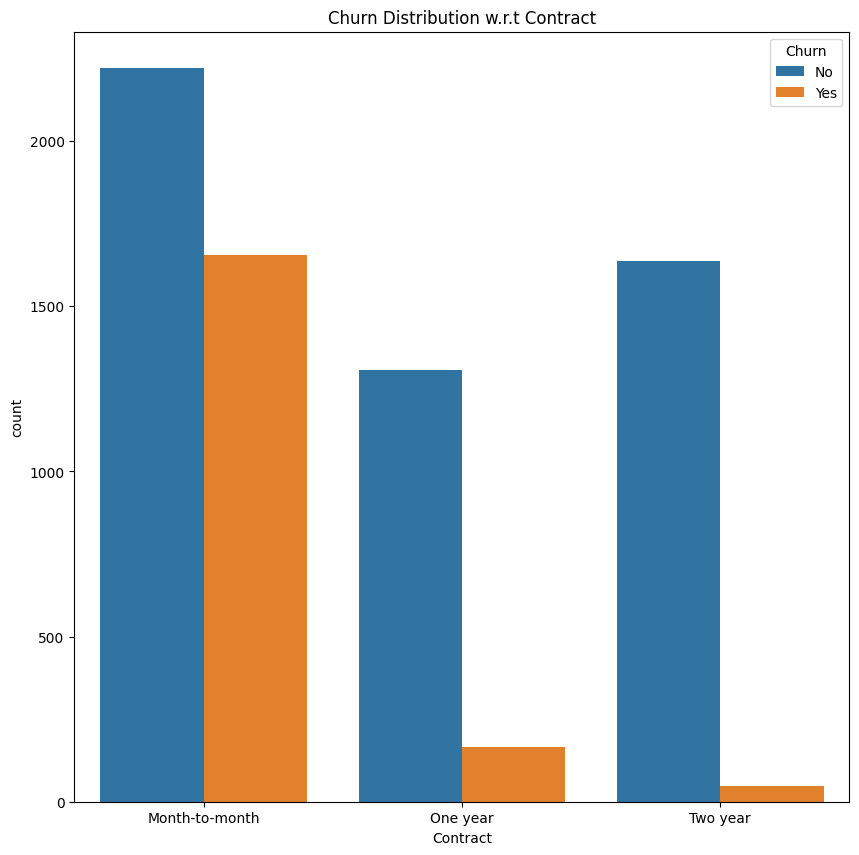

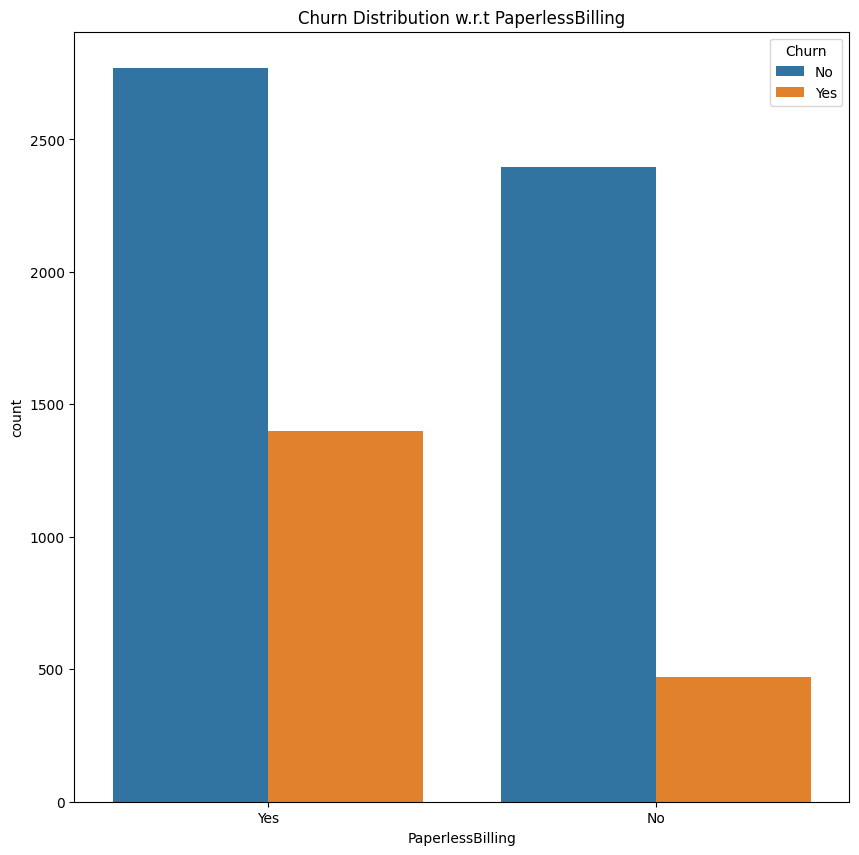

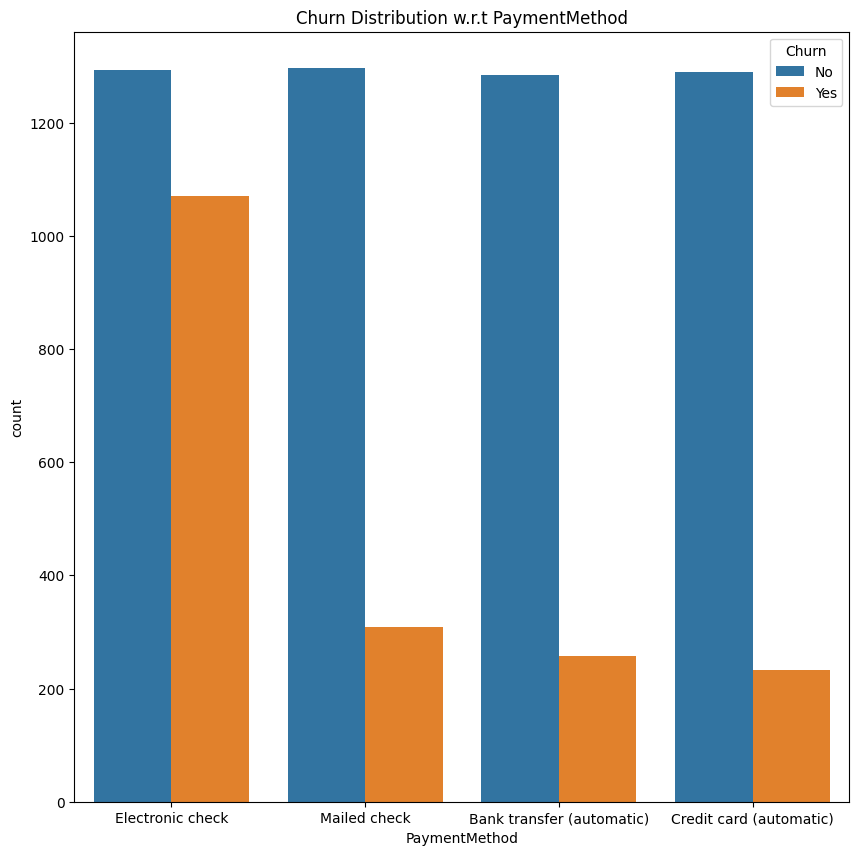

In [784]:

# Sample data (assuming 'churn_df' contains relevant columns)
# Replace 'churn' and 'gender' with the actual column names from your DataFrame.
col=['gender','SeniorCitizen','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for feature in col:
    data = churn_df[['Churn', feature]]
    plt.figure(figsize=(10, 10))
    plt.title(f'Churn Distribution w.r.t {feature}')
    sns.countplot(data=data, x=feature, hue='Churn')
    plt.show()


There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [785]:
# sns.heatmap(churn_df.corr())

# 7. Data Preprocessing¶




In [786]:
# churn_df["LiveStreaming"]=churn_df['StreamingMovies']
churn_df=churn_df.drop(['StreamingMovies','StreamingTV','TotalCharges'],axis=1)

In [883]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70,1


In [787]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [788]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [789]:
churn_df = churn_df.apply(lambda x: object_to_int(x))
churn_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,1,3,74.40,1


<Axes: >

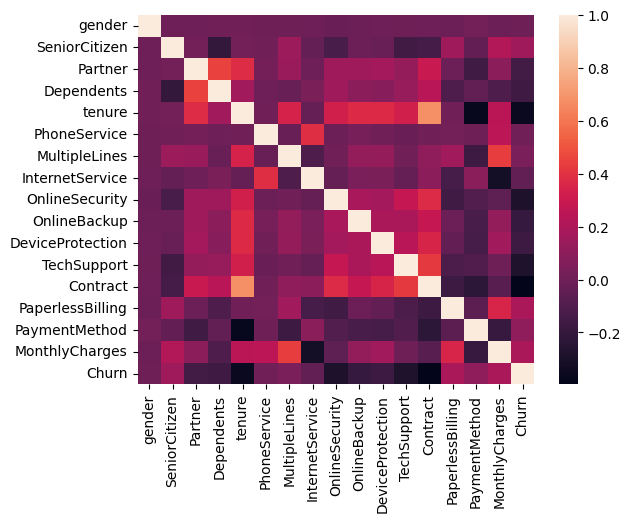

In [790]:
sns.heatmap(churn_df.corr())

In [791]:
#train test solit
from sklearn.model_selection import train_test_split

In [792]:
X=churn_df.drop(columns=['Churn'])
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,1,3,74.40


In [793]:
y=churn_df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [794]:

# 8. Machine Learning Model Evaluations and Prediction


In [795]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=.3)

In [796]:
 from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score,accuracy_score



# RidegClassifier

In [797]:
lr=LogisticRegression()
rc=RidgeClassifier()

In [798]:
rc.fit(X_train,y_train)

RidgeClassifier()

In [799]:
y_pred=rc.predict(X_test)

In [800]:
confusion_matrix(y_test,y_pred)

array([[1424,  127],
       [ 279,  280]], dtype=int64)

In [801]:
precision_score(y_test,y_pred)

0.687960687960688

In [802]:
recall_score(y_test,y_pred)

0.5008944543828264

In [803]:
f1_score(y_test,y_pred)

0.5797101449275361

In [804]:
accuracy_score(y_test,y_pred)

0.8075829383886256

In [805]:
#paramter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [806]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
grid_search=GridSearchCV(rc,param_grid=grid,cv=5,scoring='accuracy',n_jobs=-1)

In [807]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='accuracy')

In [808]:
grid_search.best_params_

{'alpha': 0.1}

In [809]:
rc=RidgeClassifier(alpha=.1)

In [810]:
rc.fit(X_train,y_train)

RidgeClassifier(alpha=0.1)

In [811]:
y_pred=rc.predict(X_test)

In [812]:
confusion_matrix(y_test,y_pred)

array([[1424,  127],
       [ 279,  280]], dtype=int64)

In [813]:
precision_score(y_test,y_pred)

0.687960687960688

In [814]:
recall_score(y_test,y_pred)

0.5008944543828264

In [815]:
f1_score(y_test,y_pred)

0.5797101449275361

In [816]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88      1551\n           1       0.69      0.50      0.58       559\n\n    accuracy                           0.81      2110\n   macro avg       0.76      0.71      0.73      2110\nweighted avg       0.80      0.81      0.80      2110\n'

In [817]:
accuracy_score(y_test,y_pred)

0.8075829383886256

# LogisticsRegression

In [818]:
lr.fit(X_train,y_train)

C:\Users\Acer\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [819]:
y_pred=lr.predict(X_test)

In [820]:
confusion_matrix(y_test,y_pred)

array([[1393,  158],
       [ 250,  309]], dtype=int64)

In [821]:
precision_score(y_test,y_pred)

0.6616702355460385

In [822]:
recall_score(y_test,y_pred)

0.552772808586762

In [823]:
f1_score(y_test,y_pred)

0.6023391812865496

In [824]:
accuracy_score(y_test,y_pred)

0.8066350710900474

In [825]:
lr=LogisticRegression(solver='liblinear')

In [826]:
#hyperparamter tunning
logistics_param=param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],          # Regularization type
}

grid_search=GridSearchCV(lr,param_grid=logistics_param,scoring='accuracy',cv=5)

In [827]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [828]:
grid_search.best_params_
lr=grid_search.best_estimator_

In [829]:
lr.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [830]:
y_pred=lr.predict(X_test)

In [831]:
confusion_matrix(y_test,y_pred)

array([[1393,  158],
       [ 249,  310]], dtype=int64)

In [832]:
precision_score(y_test,y_pred)

0.6623931623931624

In [833]:
recall_score(y_test,y_pred)

0.554561717352415

In [834]:
f1_score(y_test,y_pred)

0.6037000973709834

In [835]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87      1551\n           1       0.66      0.55      0.60       559\n\n    accuracy                           0.81      2110\n   macro avg       0.76      0.73      0.74      2110\nweighted avg       0.80      0.81      0.80      2110\n'

In [836]:
accuracy_score(y_test,y_pred)

0.8071090047393364

# svc

In [837]:
from sklearn.svm import SVC

In [838]:
support_vector_m=SVC()

In [839]:
support_vector_m.fit(X_train,y_train)



SVC()

In [840]:
y_pred=support_vector_m.predict(X_test)

In [841]:
confusion_matrix(y_test,y_pred)

array([[1443,  108],
       [ 322,  237]], dtype=int64)

In [842]:
precision_score(y_test,y_pred)

0.6869565217391305

In [843]:
recall_score(y_test,y_pred)

0.42397137745974955

In [844]:
f1_score(y_test,y_pred)

0.5243362831858407

In [845]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.93      0.87      1551\n           1       0.69      0.42      0.52       559\n\n    accuracy                           0.80      2110\n   macro avg       0.75      0.68      0.70      2110\nweighted avg       0.78      0.80      0.78      2110\n'

In [846]:
accuracy_score(y_test,y_pred)

0.7962085308056872

# knn classifer


In [847]:
from sklearn.neighbors import KNeighborsClassifier

In [848]:
KNN=KNeighborsClassifier()

In [849]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [850]:
y_pred=KNN.predict(X_test)

In [851]:
precision_score(y_test,y_pred)

0.5883495145631068

In [852]:
recall_score(y_test,y_pred)

0.5420393559928444

In [853]:
f1_score(y_test,y_pred)

0.5642458100558658

In [854]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85      1551\n           1       0.59      0.54      0.56       559\n\n    accuracy                           0.78      2110\n   macro avg       0.71      0.70      0.71      2110\nweighted avg       0.77      0.78      0.78      2110\n'

In [855]:
accuracy_score(y_test,y_pred)

0.7781990521327015

# random forest


In [856]:
from sklearn.ensemble import RandomForestClassifier

In [857]:
rfc=RandomForestClassifier()

In [858]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [859]:
y_pred=rfc.predict(X_test)

In [860]:
confusion_matrix(y_test,y_pred)

array([[1367,  184],
       [ 279,  280]], dtype=int64)

In [861]:
precision_score(y_test,y_pred)

0.603448275862069

In [862]:
recall_score(y_test,y_pred)

0.5008944543828264

In [863]:
f1_score(y_test,y_pred)

0.5474095796676441

In [864]:
accuracy_score(y_test,y_pred)

0.7805687203791469

In [865]:
# hypeparamter tunning

random_param = { 
   
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    
} 

In [866]:
grid_search=GridSearchCV(rfc,param_grid=random_param,cv=5,scoring='accuracy',n_jobs=-1)

In [867]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [868]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 'log2'}

In [869]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2')

In [870]:
rfc=RandomForestClassifier(max_depth=6,max_features='sqrt')

In [871]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [872]:
y_pred=rfc.predict(X_test)

In [873]:
confusion_matrix(y_test,y_pred)

array([[1419,  132],
       [ 293,  266]], dtype=int64)

In [874]:
precision_score(y_test,y_pred)

0.6683417085427136

In [875]:
recall_score(y_test,y_pred)

0.47584973166368516

In [876]:
f1_score(y_test,y_pred)

0.5559038662486938

In [877]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.91      0.87      1551\n           1       0.67      0.48      0.56       559\n\n    accuracy                           0.80      2110\n   macro avg       0.75      0.70      0.71      2110\nweighted avg       0.79      0.80      0.79      2110\n'

In [878]:
accuracy_score(y_test,y_pred)

0.7985781990521327

# end to TASK -3

# RIDGE CLASSIFEIR IS USED 

In [879]:
import pickle

In [880]:
pickle.dump(temp_df,open("data.pkl","wb"))
pickle.dump(rc,open("model.pkl","wb"))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70,1


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')